In [1]:
#set specific working directory
#setwd("~/Desktop/R_STUFF")

# load performance improvement libraries & enable just in time compiler
library(compiler)
enableJIT(1)

#some environmental variables (decimals)
options=7
options(citr.use_betterbiblatex = FALSE)

[1] 3

In [31]:
#check if required packages are there - if not install them!
requiredPackages = c('gdata','compiler','car','lsr','sft','nlme', 'lme4', 'bibtex', 'psych', 'likert', 'ggplot2', 'tidyverse')
for(p in requiredPackages){
  if(!require(p,character.only = TRUE)) install.packages(p)
  library(p,character.only = TRUE)
}
#load all the libraries    
lapply(requiredPackages, require, character.only = TRUE)

Loading required package: car
Warning message:
“package ‘car’ was built under R version 3.4.1”
Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode

The following object is masked from ‘package:purrr’:

    some

The following object is masked from ‘package:likert’:

    recode

The following object is masked from ‘package:psych’:

    logit



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

In [3]:
# Importing the data 
data <- read.xls("TimeAnalysis2_1.xlsx", verbose=FALSE, na.strings=c("NA"))

In [4]:
head(data)

ParticipantNo,ID,PDF,Order,Time,Condition,CExperience,Tasks,Error
1,-JjAzwjQakZk-3kIbeMfw,U2PXr4iMBf8Kt-leQI8Ii,1,435,1,1,9,0
1,-JjAzwjQakZk-3kIbeMfw,4gIe5sni3WJJCzNglSdo8,2,582,0,1,9,0
1,-JjAzwjQakZk-3kIbeMfw,iHbGgWtrKNfksdoj9Hxv9,3,297,1,1,9,0
1,-JjAzwjQakZk-3kIbeMfw,cnDXl97I_WoVUqyIH0HbQ,4,610,0,1,9,0
2,hNQKTiKtHSY_BmxLyZb9Q,XOCbiBddVQK3BYy1Ox4lI,1,306,1,1,8,0
2,hNQKTiKtHSY_BmxLyZb9Q,oOAy7INgRLumTV3vZWtVM,2,127,1,1,8,0


In [6]:
summary(data)

 ParticipantNo                      ID                         PDF     
 Min.   : 1.0   -JjAzwjQakZk-3kIbeMfw:  4   0nx4Zi7dVYn5EQ3dNItt-:  7  
 1st Qu.:10.0   -O8MP5AR-esmcnFcENyoF:  4   C3Yt_3KsVfsQvroPQZVRS:  6  
 Median :19.5   -YoLEIFk1XZUJo3BgVmlp:  4   CcOYVSOYGJaipVrXMOL8w:  6  
 Mean   :19.5   2K-K26QZH9xPJH9RVMltM:  4   ChNQN3VMGJgdvnhdhOkni:  6  
 3rd Qu.:29.0   2snvok14kLm_dRIdL67PF:  4   maIR13XMswWK4r7a8EQjE:  6  
 Max.   :38.0   3CDOco99k3UGgia7A9LQo:  4   4gIe5sni3WJJCzNglSdo8:  5  
                (Other)              :128   (Other)              :116  
     Order           Time          Condition    CExperience         Tasks      
 Min.   :1.00   Min.   : 111.0   Min.   :0.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:1.75   1st Qu.: 313.2   1st Qu.:0.0   1st Qu.:1.0000   1st Qu.:6.000  
 Median :2.50   Median : 581.0   Median :0.5   Median :1.0000   Median :8.000  
 Mean   :2.50   Mean   : 807.8   Mean   :0.5   Mean   :0.7895   Mean   :7.053  
 3rd Qu.:3.25   3rd Qu.:

In [9]:
ml.model = lmer(Time ~ Condition + (1 | ID) + (1 | PDF), data=data)

##### Comments on the Mixed Effects Model
We want to know if machine learning (Condition) has an influence on how long people take to complete a Risk of Bias assessment of a Document. Dependent variable: Time, Fixed Effect: Condition.<br>
The error term or <b>random effect</b> (Epsilon) is accounted for here by the <b>NON-INDEPENDENCE</b> in our data. Our experimental design was a within-subjects design meaning one participant saw 4 documents (one after the other) which breaks indepencence here. 

In [17]:
# hence again here 4 rows per particpant (ID)
head(data)

ParticipantNo,ID,PDF,Order,Time,Condition,CExperience,Tasks,Error
1,-JjAzwjQakZk-3kIbeMfw,U2PXr4iMBf8Kt-leQI8Ii,1,435,1,1,9,0
1,-JjAzwjQakZk-3kIbeMfw,4gIe5sni3WJJCzNglSdo8,2,582,0,1,9,0
1,-JjAzwjQakZk-3kIbeMfw,iHbGgWtrKNfksdoj9Hxv9,3,297,1,1,9,0
1,-JjAzwjQakZk-3kIbeMfw,cnDXl97I_WoVUqyIH0HbQ,4,610,0,1,9,0
2,hNQKTiKtHSY_BmxLyZb9Q,XOCbiBddVQK3BYy1Ox4lI,1,306,1,1,8,0
2,hNQKTiKtHSY_BmxLyZb9Q,oOAy7INgRLumTV3vZWtVM,2,127,1,1,8,0


In [10]:
ml.model

Linear mixed model fit by REML ['lmerMod']
Formula: Time ~ Condition + (1 | ID) + (1 | PDF)
   Data: data
REML criterion at convergence: 2416.251
Random effects:
 Groups   Name        Std.Dev.
 PDF      (Intercept)   0.0   
 ID       (Intercept) 534.8   
 Residual             624.9   
Number of obs: 152, groups:  PDF, 46; ID, 38
Fixed Effects:
(Intercept)    Condition  
     841.28       -67.01  

In [11]:
summary(ml.model)

Linear mixed model fit by REML ['lmerMod']
Formula: Time ~ Condition + (1 | ID) + (1 | PDF)
   Data: data

REML criterion at convergence: 2416.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0493 -0.4095 -0.1687  0.2313  4.1152 

Random effects:
 Groups   Name        Variance Std.Dev.
 PDF      (Intercept)      0     0.0   
 ID       (Intercept) 286030   534.8   
 Residual             390474   624.9   
Number of obs: 152, groups:  PDF, 46; ID, 38

Fixed effects:
            Estimate Std. Error t value
(Intercept)   841.28     112.54   7.475
Condition     -67.01     101.37  -0.661

Correlation of Fixed Effects:
          (Intr)
Condition -0.450

##### Random effects first:
Column <b>Std.Dev</b>: measure of variablility for each random effect added to the model. Note: PDF (documents) have no variability here.<br>
<b>Resuduals:</b> Vaiability which is not due to PDF (document) or ID (subject) this is essentially the (Epsilon) - random eviations from the predicted values that are not due to documents and participants<br>
<b>Here:</b> Each and every timing measure whether in the machine learning condittion or not is infuenced quite a bit by somthing outside of the model (resudial quite high? 624.9)<br>


##### Now lets have a look at fixed effects:
The coefficient 'Condition' (Machine-Learning or not) is the slope for the (categorical) effect of the machine learning.<br>
So <b>-67.01</b> means that to go from 'non-machine-learning' to 'machine learning'? We have to go down. Because 0 before 1?<br>
In other words Time is lower in where machine-learning assistance is present than in non-machine learning tasks. More precicely: <b>about 67s</b><br>
Then, there’s a standard error associated with this slope, and a t-value, which is simply the estimate (67s) divided by the standard error.<br>
<b>Note:</b> The lmer() function (just like the lm() function) took whatever comes first in the alphabet to be the reference level. I assume this is the same for Numerical values 0/1? (in case inverse slope just positive but standard errors, significance etc. would remain the same.)<br>

#### Statistical Significance

$p-values$ for mixed models aren’t as straightforward as they are for the linear model. There are multiple approaches, and there’s a discussion surrounding these, with sometimes wildly differing opinions about which approach is the best.

#### Likelyhood Ratio Test
The logic of the likelihood ratio test is to compare the likelihood of two models with each other. First, the model without the factor that we’re interested in (the null model), then the model with the factor that we’re interested in.<br>
<b>The fixed effect is significant if the difference between the likelihood of these two models is significant</b>

In [19]:
ml.null = lmer(Time ~ Order + (1|ID) + (1|PDF), data=data, REML=FALSE)
# REML=FALSE changes internal likelyhood estimator Pinheiro & Bates, 2000; Bolker et al., 2009

In [20]:
ml.main = lmer(Time ~ Condition + (1|ID) + (1|PDF), data=data, REML=FALSE)

In [24]:
a <- anova(ml.null, ml.main)
summary(a)
a

       Df         AIC            BIC           logLik         deviance   
 Min.   :5   Min.   :2424   Min.   :2439   Min.   :-1219   Min.   :2414  
 1st Qu.:5   1st Qu.:2430   1st Qu.:2445   1st Qu.:-1216   1st Qu.:2420  
 Median :5   Median :2436   Median :2451   Median :-1213   Median :2426  
 Mean   :5   Mean   :2436   Mean   :2451   Mean   :-1213   Mean   :2426  
 3rd Qu.:5   3rd Qu.:2442   3rd Qu.:2457   3rd Qu.:-1210   3rd Qu.:2432  
 Max.   :5   Max.   :2448   Max.   :2463   Max.   :-1207   Max.   :2438  
                                                                         
     Chisq       Chi Df    Pr(>Chisq)
 Min.   :0   Min.   :0   Min.   :1   
 1st Qu.:0   1st Qu.:0   1st Qu.:1   
 Median :0   Median :0   Median :1   
 Mean   :0   Mean   :0   Mean   :1   
 3rd Qu.:0   3rd Qu.:0   3rd Qu.:1   
 Max.   :0   Max.   :0   Max.   :1   
 NA's   :1   NA's   :1   NA's   :1   

,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
ml.null,5,2423.708,2438.828,-1206.854,2413.708,NA,NA,NA
ml.main,5,2448.366,2463.486,-1219.183,2438.366,0,0,1


In [25]:
# interactions?

In [26]:
# Random slopes versus random intercepts?

In [27]:
coef(ml.model)

$PDF
                      (Intercept) Condition
0nx4Zi7dVYn5EQ3dNItt-    841.2763 -67.01316
1oRxFbc15dGemlIVay6To    841.2763 -67.01316
1W2m3hOjAPEzUifHcCjF9    841.2763 -67.01316
2zFP1Ahjjhq-L21Yi3U_6    841.2763 -67.01316
4gIe5sni3WJJCzNglSdo8    841.2763 -67.01316
5uEM6bY-KKcueJUcApFwi    841.2763 -67.01316
6w3O6fmiWA3Fm5pJEPTyK    841.2763 -67.01316
BwSirMyg7H8f_qVrpY9P0    841.2763 -67.01316
BXUVehBvfeMUVUB46B_zB    841.2763 -67.01316
C3Yt_3KsVfsQvroPQZVRS    841.2763 -67.01316
CcOYVSOYGJaipVrXMOL8w    841.2763 -67.01316
ChNQN3VMGJgdvnhdhOkni    841.2763 -67.01316
cnDXl97I_WoVUqyIH0HbQ    841.2763 -67.01316
CuWH9c-7JemOEHwMwjfqb    841.2763 -67.01316
DeOXhZ9L5hAry4miUt-X8    841.2763 -67.01316
dF3CKQJaMb8UjWid98kuq    841.2763 -67.01316
eEspRffpxcT05-QtNWoWF    841.2763 -67.01316
GaKsuTElGCdIRmyaDrXy5    841.2763 -67.01316
gD_JugCFB6D5iV-JIOI0p    841.2763 -67.01316
gJHgJsIPWuhzo8OrO9_4W    841.2763 -67.01316
Hyb9RdMbOSUQjW1e3fRxL    841.2763 -67.01316
i2GK-dBdzq8hQV26C_5Jl    84

Each document (PDF) and each participant (ID) is assigned a different intercept. That’s what we would expect, given that we’ve told the model with “(1|PDF)” and “(1|ID)” to take by-particpant and by-document variability into account.<br>
<b>Here above: coefficients always negative - despite individual variation there is consistency on how Condition (machine learning) affects the time (negative)?</b>

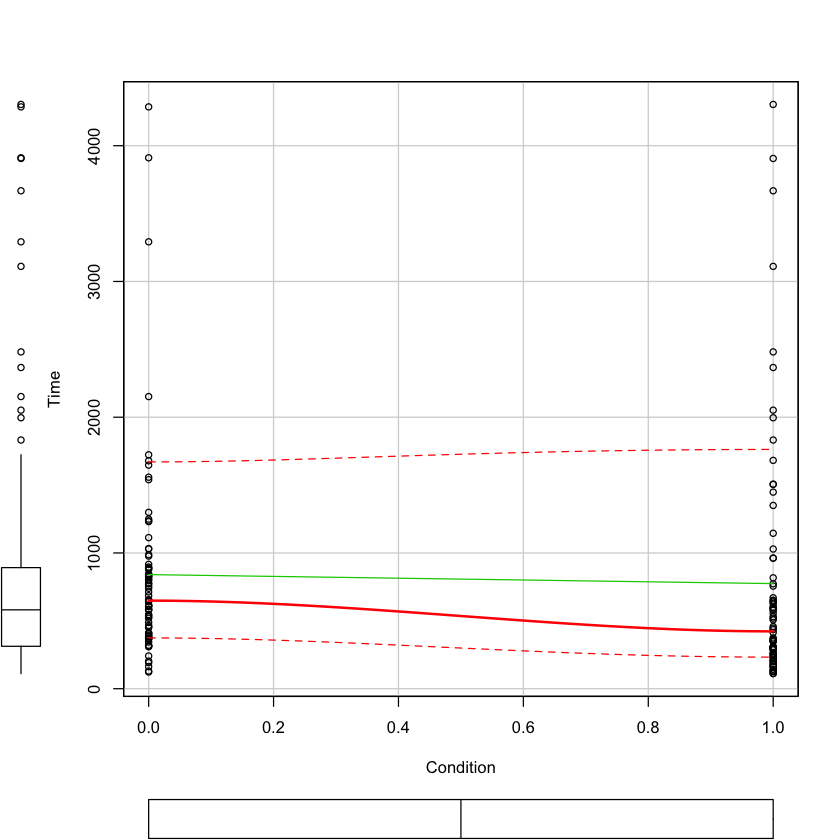

In [33]:
scatterplot(Time ~ Condition, data=data)